In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
# Load the datasets
client = pd.read_csv(r"Dataset/application_record.csv")
credit = pd.read_csv(r"Dataset/credit_record.csv")

print(f"Client dataframe loaded with shape: {client.shape}")
print(f"Credit dataframe loaded with shape: {credit.shape}")

Client dataframe loaded with shape: (438557, 18)
Credit dataframe loaded with shape: (1048575, 3)


### Prepare before merge

Client

In [3]:
print("Step 1: Basic EDA on Client and Credit Data")

print("\nClient Data - Shape:", client.shape)
print("Credit Data - Shape:", credit.shape)

print("\nClient Data - First 5 Rows:")
display(client.head())

print("\nClient Data - Last 5 Rows:")
display(client.tail())

print("\nClient Data - Info (Data Types & Non-Nulls):")
client.info()

print("\nClient Data - Statistical Summary (Numerical):")
display(client.describe())

print("\nClient Data - Statistical Summary (Categorical):")
display(client.describe(include=['object', 'category']))

Step 1: Basic EDA on Client and Credit Data

Client Data - Shape: (438557, 18)
Credit Data - Shape: (1048575, 3)

Client Data - First 5 Rows:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Client Data - Last 5 Rows:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0



Client Data - Info (Data Types & Non-Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           4

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000



Client Data - Statistical Summary (Categorical):


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [4]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
# Create 'AGE' and 'YEARS_EMPLOYED' for easier interpretation
client['AGE'] = -client['DAYS_BIRTH'] / 365
client['YEARS_EMPLOYED'] = -client['DAYS_EMPLOYED'] / 365

# Correct for positive 'DAYS_EMPLOYED' which indicates unemployment (or 0)
client['YEARS_EMPLOYED'] = client['YEARS_EMPLOYED'].apply(lambda x: x if x > 0 else 0)

print("Created 'AGE' and 'YEARS_EMPLOYED' columns.")
display(client[['AGE', 'YEARS_EMPLOYED']].head())

Created 'AGE' and 'YEARS_EMPLOYED' columns.


,AGE,YEARS_EMPLOYED
0,32.890411,12.443836
1,32.890411,12.443836
2,58.832877,3.106849
3,52.356164,8.358904
4,52.356164,8.358904


Step 2: Missing Value Analysis

Missing values in Client Data:
OCCUPATION_TYPE    134203
dtype: int64


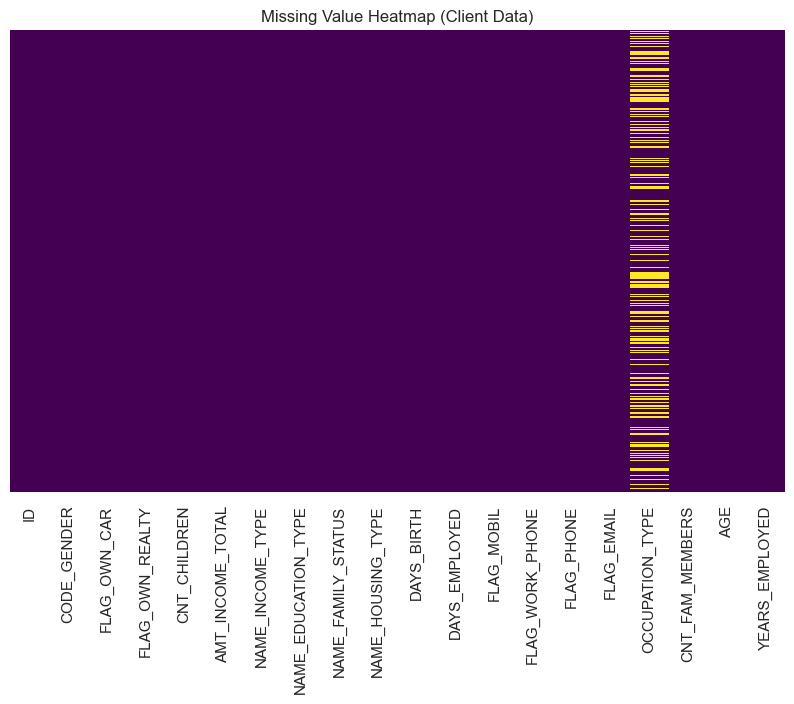


Handled missing values in 'OCCUPATION_TYPE' by filling with 'Unknown'.
Missing values in 'OCCUPATION_TYPE' after handling: 0


In [7]:
print("Step 2: Missing Value Analysis")

print("\nMissing values in Client Data:")
client_missing = client.isnull().sum()
print(client_missing[client_missing > 0])

# Visualize missing values in client data
if client_missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(client.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Value Heatmap (Client Data)')
    plt.show()

# Handling: Fill 'OCCUPATION_TYPE' with 'Unknown' (a common strategy)
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
client['OCCUPATION_TYPE'] = imputer.fit_transform(client[['OCCUPATION_TYPE']]).ravel()

print("\nHandled missing values in 'OCCUPATION_TYPE' by filling with 'Unknown'.")
print(f"Missing values in 'OCCUPATION_TYPE' after handling: {client['OCCUPATION_TYPE'].isnull().sum()}")

#Here, this is a missing value heatmap where the missing values are shown with yellow color and the non-missing values are shown with purple color.

--- Generating Missing Value Heatmap ---


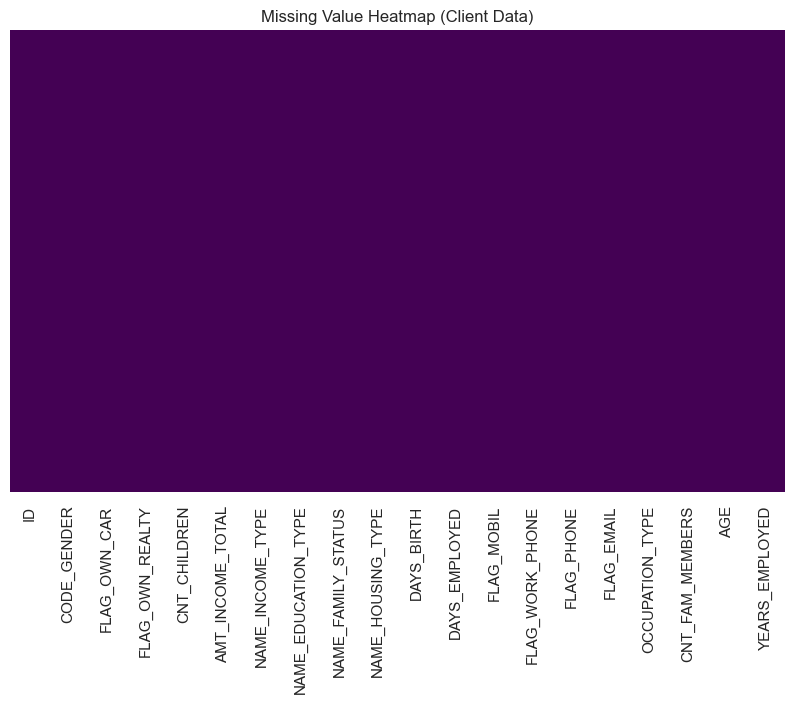

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generating Missing Value Heatmap ---")

# We create a heatmap of the 'client' dataframe's null values
# cbar=False turns off the color bar
# yticklabels=False cleans up the y-axis
# cmap='viridis' gives it the yellow-and-purple color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(client.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap (Client Data)')
plt.show()

In [9]:
print("Step 3: Duplicate Analysis")

# Check for duplicate client IDs in the application data
client_dupes = client['ID'].duplicated().sum()
print(f"Number of duplicate 'ID' entries in Client Data: {client_dupes}")

# Handling: Drop duplicate IDs, keeping the first instance
if client_dupes > 0:
    client_original_rows = client.shape[0]
    client.drop_duplicates(subset=['ID'], keep='first', inplace=True)
    print(f"Handled duplicates: Removed {client_dupes} duplicate 'ID' rows.")
    print(f"New 'client' dataframe shape: {client.shape}")

Step 3: Duplicate Analysis
Number of duplicate 'ID' entries in Client Data: 47
Handled duplicates: Removed 47 duplicate 'ID' rows.
New 'client' dataframe shape: (438510, 20)


Step 4: Outlier Analysis
Displaying boxplots to identify outliers...


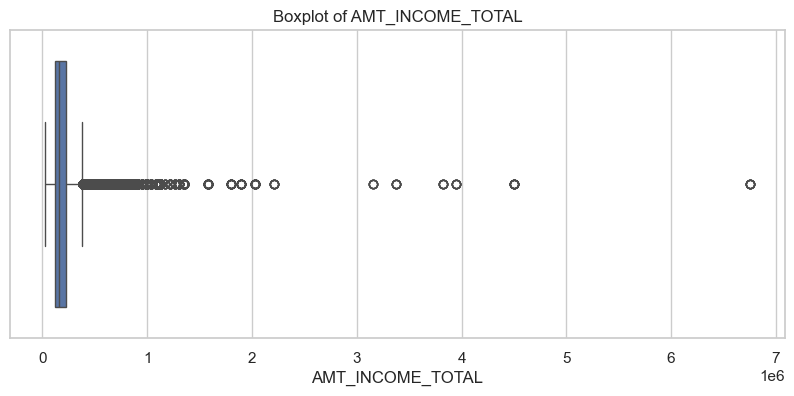

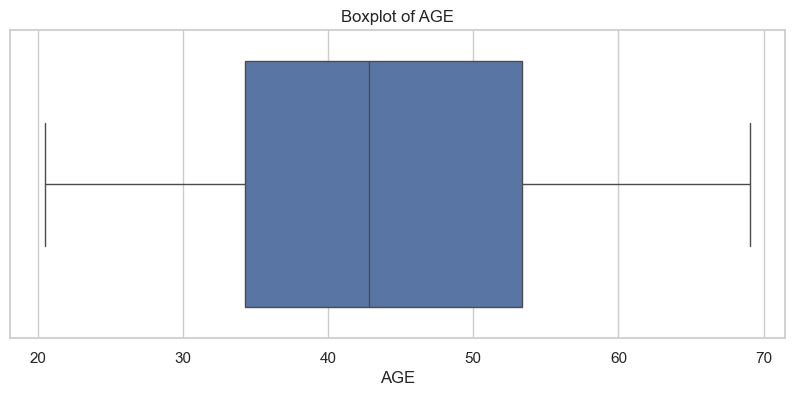

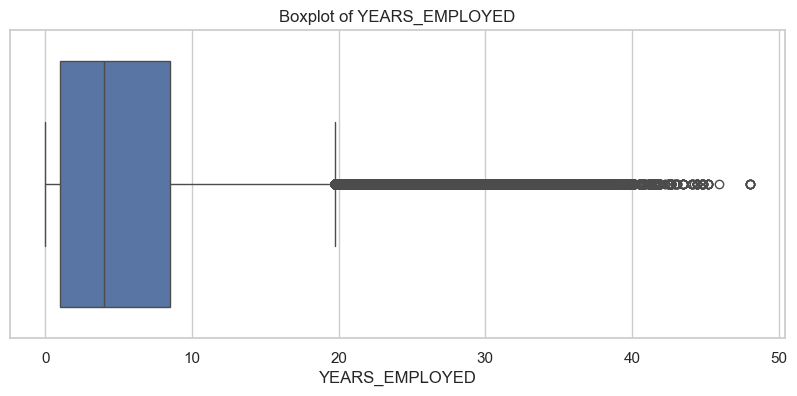


Applied log-transformation to 'AMT_INCOME_TOTAL' (created 'LOG_INCOME').


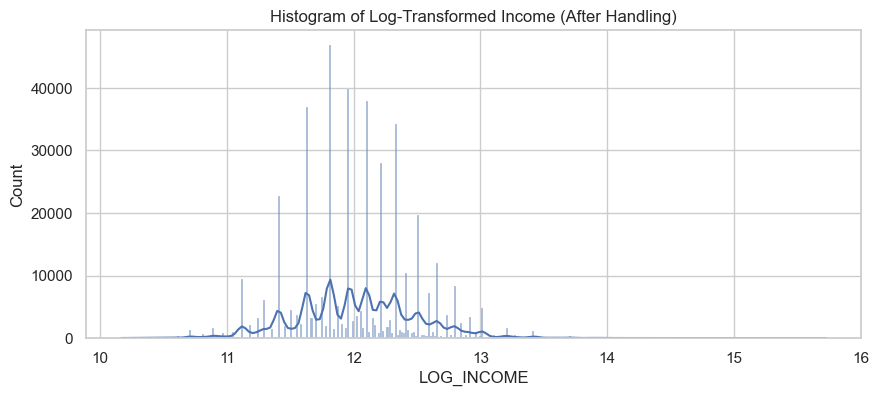

In [10]:
print("Step 4: Outlier Analysis")

# Identify outliers in numerical columns using boxplots
numerical_cols = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED']

print("Displaying boxplots to identify outliers...")
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=client[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling: Log transformation for 'AMT_INCOME_TOTAL' to reduce skewness
client['LOG_INCOME'] = np.log1p(client['AMT_INCOME_TOTAL'])
print("\nApplied log-transformation to 'AMT_INCOME_TOTAL' (created 'LOG_INCOME').")

# Show the new distribution
plt.figure(figsize=(10, 4))
sns.histplot(client['LOG_INCOME'], kde=True)
plt.title('Histogram of Log-Transformed Income (After Handling)')
plt.show()

In [11]:
print("Step 5: Full Data Encoding")

client_encoded = client.drop(['ID', 'AMT_INCOME_TOTAL'], axis=1).copy()

# 1. Ordinal Encoding
# We define the logical order of education levels
education_order = [
    'Lower secondary', 
    'Secondary / secondary special', 
    'Incomplete higher', 
    'Higher education', 
    'Academic degree'
]

# Create a map for the order
education_map = {level: i for i, level in enumerate(education_order)}

# Apply the mapping to the 'NAME_EDUCATION_TYPE' column
client_encoded['NAME_EDUCATION_TYPE'] = client_encoded['NAME_EDUCATION_TYPE'].map(education_map)

print("Applied Ordinal Encoding to 'NAME_EDUCATION_TYPE'.")


# 2. One-Hot Encoding
# Find all remaining categorical columns
nominal_cols = client_encoded.select_dtypes(include=['object']).columns

print(f"\nApplying One-Hot Encoding to: {list(nominal_cols)}")

# Apply One-Hot Encoding using pandas get_dummies
client_encoded = pd.get_dummies(client_encoded, columns=nominal_cols, drop_first=True)

print("\nEncoding complete.")
print("--- New 'client_encoded' dataframe Info ---")
client_encoded.info()

print("\n--- New 'client_encoded' dataframe Head ---")
display(client_encoded.head())

Step 5: Full Data Encoding
Applied Ordinal Encoding to 'NAME_EDUCATION_TYPE'.

Applying One-Hot Encoding to: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

Encoding complete.
--- New 'client_encoded' dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 438510 entries, 0 to 438556
Data columns (total 46 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   CNT_CHILDREN                             438510 non-null  int64  
 1   NAME_EDUCATION_TYPE                      438510 non-null  int64  
 2   DAYS_BIRTH                               438510 non-null  int64  
 3   DAYS_EMPLOYED                            438510 non-null  int64  
 4   FLAG_MOBIL                               438510 non-null  int64  
 5   FLAG_WORK_PHONE                          438510 non-null  int64  
 6   FLAG_PHONE     

,CNT_CHILDREN,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,0,3,-12005,-4542,1,1,0,0,2.0,32.890411,...,False,False,False,False,False,False,False,False,True,False
1,0,3,-12005,-4542,1,1,0,0,2.0,32.890411,...,False,False,False,False,False,False,False,False,True,False
2,0,1,-21474,-1134,1,0,0,0,2.0,58.832877,...,False,False,False,False,False,False,False,True,False,False
3,0,1,-19110,-3051,1,0,1,1,1.0,52.356164,...,False,False,False,False,False,True,False,False,False,False
4,0,1,-19110,-3051,1,0,1,1,1.0,52.356164,...,False,False,False,False,False,True,False,False,False,False


Step 6: Univariate Analysis


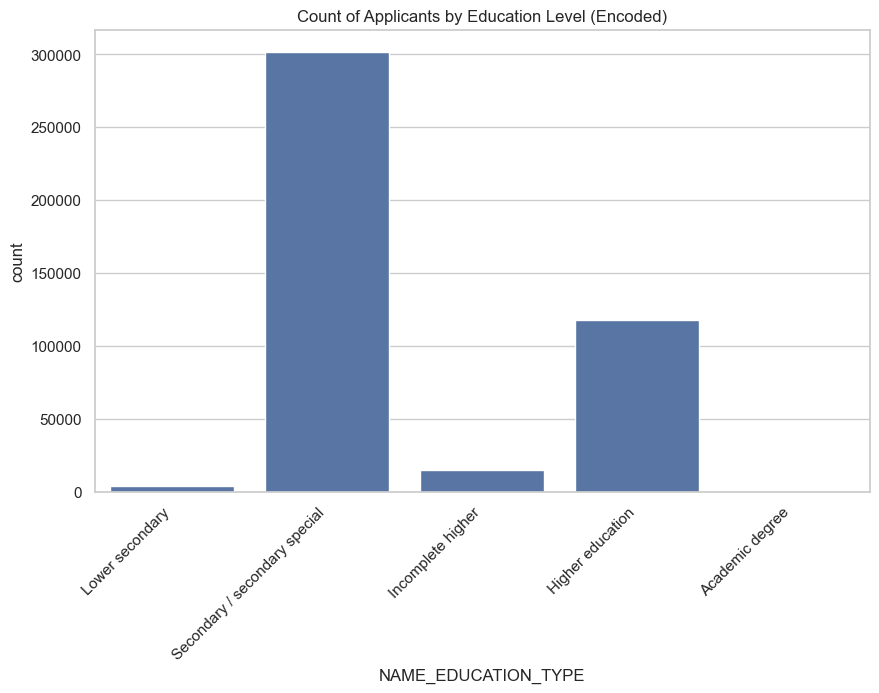

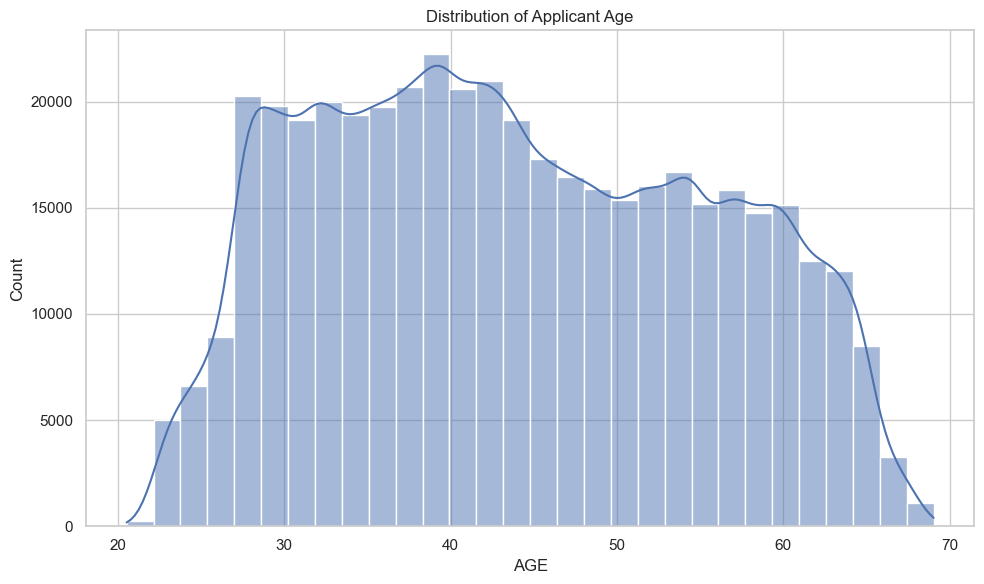

In [12]:
print("Step 6: Univariate Analysis")

# Categorical (Now Numeric)
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', data=client_encoded)
plt.title('Count of Applicants by Education Level (Encoded)')

plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45, ha='right')
plt.show()

# Numerical
plt.figure(figsize=(10, 6))
sns.histplot(client_encoded['AGE'], kde=True, bins=30)
plt.title('Distribution of Applicant Age')
plt.tight_layout()
plt.show()

Step 6: Bivariate Analysis


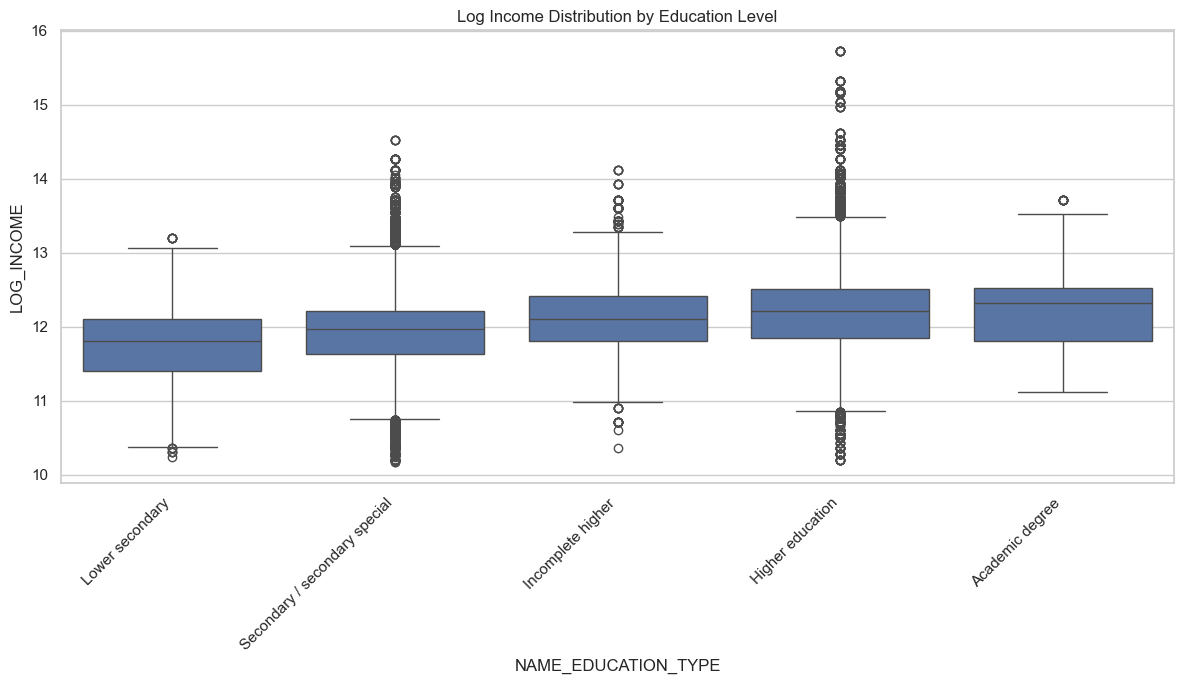

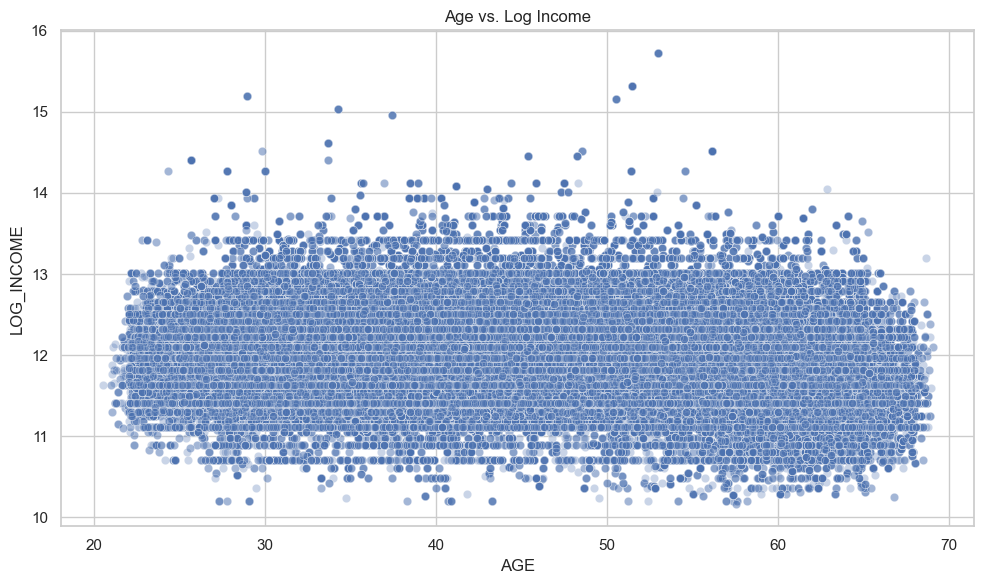

In [13]:
print("Step 6: Bivariate Analysis")

# Categorical vs. Numerical: Boxplot of (Log) Income by Education Level
# The x-axis is encoded education column
plt.figure(figsize=(12, 7))
sns.boxplot(x='NAME_EDUCATION_TYPE', y='LOG_INCOME', data=client_encoded)
plt.title('Log Income Distribution by Education Level')
plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Numerical vs. Numerical: Scatterplot of Age vs. Log Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='LOG_INCOME', data=client_encoded, alpha=0.3, )
plt.title('Age vs. Log Income')
plt.tight_layout()
plt.show()

Step 6: Multivariate Analysis(Correlation Heatmap)


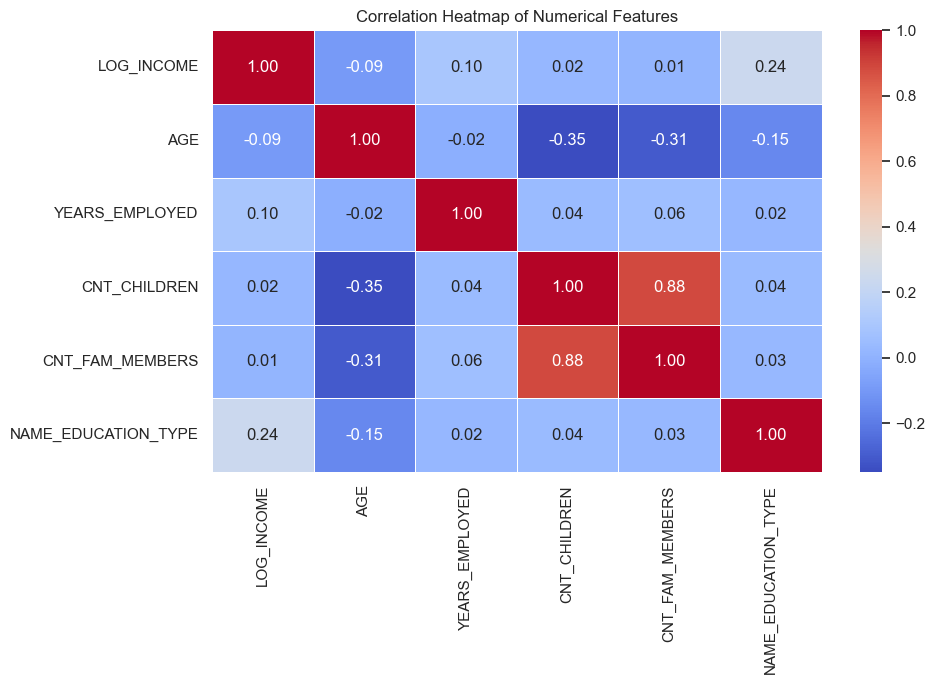

In [14]:
print("Step 6: Multivariate Analysis(Correlation Heatmap)")


numeric_features_for_corr = [
    'LOG_INCOME', 
    'AGE', 
    'YEARS_EMPLOYED', 
    'CNT_CHILDREN', 
    'CNT_FAM_MEMBERS',
    'NAME_EDUCATION_TYPE'  # Add the new numeric column
]
corr_matrix = client_encoded[numeric_features_for_corr].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [15]:
print("Step 7: Feature Scaling (Demonstration)")

# Define the columns we want to scale (all our main numeric features)
cols_to_scale = [
    'LOG_INCOME', 
    'AGE', 
    'YEARS_EMPLOYED', 
    'CNT_CHILDREN', 
    'CNT_FAM_MEMBERS',
    'NAME_EDUCATION_TYPE'
]

scaler = StandardScaler()

client_scaled_demo = client_encoded.copy()

client_scaled_demo[cols_to_scale] = scaler.fit_transform(client_scaled_demo[cols_to_scale])

print("Demonstrated Feature Scaling (StandardScaler) on main numerical columns.")
print("Scaled Data - First 5 Rows (selected columns):")
display(client_scaled_demo[cols_to_scale].head())

print("\n\nEDA and Preprocessing Steps Complete")

Step 7: Feature Scaling (Demonstration)
Demonstrated Feature Scaling (StandardScaler) on main numerical columns.
Scaled Data - First 5 Rows (selected columns):


,LOG_INCOME,AGE,YEARS_EMPLOYED,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE
0,1.982555,-0.954125,0.988319,-0.589595,-0.216747,1.602162
1,1.982555,-0.954125,0.988319,-0.589595,-0.216747,1.602162
2,-0.828327,1.308474,-0.433188,-0.589595,-0.216747,-0.627266
3,1.014995,0.743601,0.366410,-0.589595,-1.331336,-0.627266
4,1.014995,0.743601,0.366410,-0.589595,-1.331336,-0.627266




EDA and Preprocessing Steps Complete


Credit

In [16]:
credit['STATUS'].unique() # status can be 0, 1, 2, 3, 4, 5
# 0: No DPD, 1: DPD 1-30, 2: DPD 31-60, 3: DPD 61-90, 4: DPD 91-120, 5: DPD >120   DPD: Days Past Due
# C: paid off that month X: No loan for the month

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [17]:
# preparinf credit data
credit= credit[credit['STATUS'].notna()]
credit['month_from_today'] = credit['MONTHS_BALANCE'].apply(lambda x: x*-1) # convert month to positive value
credit.drop(columns= ['MONTHS_BALANCE'], inplace=True) # drop month column
credit['STATUS'] = credit['STATUS'].replace({'C':0, 'X':0}).astype(int) # replace C and X with 0, convert to int
credit['STATUS'].value_counts()

STATUS
0    1034381
1      11090
5       1693
2        868
3        320
4        223
Name: count, dtype: int64

In [18]:
credit= credit.copy()
credit['approval']= credit['STATUS'].apply(lambda x: 1 if x== 0 else 0) # 1 if no DPD, 0 otherwise
credit['approval'].value_counts()


approval
1    1034381
0      14194
Name: count, dtype: int64

In [19]:
# occupation has more than 30% NaN values, so we will drop it
client.drop(columns=['OCCUPATION_TYPE'], inplace =True)

In [20]:
client.drop_duplicates(inplace=True) # remove duplicates (if any)
credit.drop_duplicates(inplace=True) # remove duplicates (if any)

In [21]:
client.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,LOG_INCOME
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,32.890411,12.443836,12.965712
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,32.890411,12.443836,12.965712
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,58.832877,3.106849,11.630717
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,52.356164,8.358904,12.506181
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,52.356164,8.358904,12.506181


### Preprocessing

Joining the two dataframes

In [22]:
df= pd.merge(left=client, right=credit, how= 'inner', on= 'ID')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,LOG_INCOME,STATUS,month_from_today,approval
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,32.890411,12.443836,12.965712,0,0,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,32.890411,12.443836,12.965712,0,1,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,32.890411,12.443836,12.965712,0,2,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,32.890411,12.443836,12.965712,0,3,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,32.890411,12.443836,12.965712,0,4,1


In [23]:
df.shape

(777715, 23)

### Train, Valid, Test Sets

### Sampling and Scaling

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['ID', 'STATUS', 'approval']) 
y = df['approval']

# 1. Identify Categorical vs. Numerical Columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns to be encoded: {list(categorical_cols)}")

numerical_cols = X.select_dtypes(include=np.number).columns
print(f"Numerical columns to be scaled: {list(numerical_cols)}")

# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nOriginal X_train shape: {X_train.shape}")

# 3. Create the Preprocessing Pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 4. Apply Preprocessing
print("Applying preprocessing (scaling and encoding)...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Preprocessing complete.")

# 5. Apply Resampling (Oversampling)
print("Applying RandomOverSampler to the processed training data...")
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_processed, y_train)

print("Oversampling complete.")
print(f"\nShape of X_train after resampling: {X_train_resampled.shape}")
print(f"Shape of X_test (processed): {X_test_processed.shape}")
print(f"\nValue counts of y_train after resampling:\n{pd.Series(y_train_resampled).value_counts()}")

# Use X_train_resampled and y_train_resampled to TRAIN your model.
# Use X_test_processed and y_test to EVALUATE your model.

Categorical columns to be encoded: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
Numerical columns to be scaled: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED', 'LOG_INCOME', 'month_from_today']

Original X_train shape: (622172, 20)
Applying preprocessing (scaling and encoding)...
Preprocessing complete.
Applying RandomOverSampler to the processed training data...
Oversampling complete.

Shape of X_train after resampling: (1225824, 40)
Shape of X_test (processed): (155543, 40)

Value counts of y_train after resampling:
approval
1    612912
0    612912
Name: count, dtype: int64


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report


In [26]:
# Define and train various classification models
classification_models = {
    "Logistic Regression" : LogisticRegression(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    # "Support Vector Machine" : SVC(),
    # SVC can be very slow on large datasets
    "XGBoost" : XGBClassifier(),
}

print("Starting Model Training")

for name, model in classification_models.items():
    
    # Train on the RESAMPLED and PROCESSED data
    model.fit(X_train_resampled, y_train_resampled)
    print(f"\n{name} model trained.")
    
    # Predict on the PROCESSED test data
    y_pred = model.predict(X_test_processed)
    
    # Report results using the original y_test
    print(f"--- Classification Report for {name} ---")
    print(classification_report(y_test, y_pred))

Starting Model Training

Logistic Regression model trained.
--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           0       0.02      0.52      0.04      2315
           1       0.99      0.61      0.75    153228

    accuracy                           0.61    155543
   macro avg       0.50      0.57      0.40    155543
weighted avg       0.97      0.61      0.74    155543


K-Nearest Neighbors model trained.
--- Classification Report for K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.41      0.31      2315
           1       0.99      0.98      0.99    153228

    accuracy                           0.97    155543
   macro avg       0.62      0.70      0.65    155543
weighted avg       0.98      0.97      0.98    155543


Decision Tree model trained.
--- Classification Report for Decision Tree ---
              precision    recall  f1-score   support

         

- Logistic Regression with 61% (the worst performer)
- Decision Tree with 96%
- Random Forest with 96%
- XGBClassifier with 95%
- The highest model performance is K-Nearest Neighbors achieving accuracy of 97% with precision of 24% and recall of 41% for the 'refusal' class which is great compared to the other models.


In [27]:
from imblearn.over_sampling import SMOTE, ADASYN
# Using SMOTE for oversampling
smote = SMOTE(random_state=42)  
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)
# Using ADASYN for oversampling
adasyn = ADASYN(random_state=42)    
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_processed, y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_sm = KNeighborsClassifier(n_neighbors=5)
knn_sm.fit(X_train_smote, y_train_smote)
y_pred_sm = knn_sm.predict(X_test_processed)
print("KNN with SMOTE:")
print(classification_report(y_test, y_pred_sm))

KNN with SMOTE:
              precision    recall  f1-score   support

           0       0.17      0.54      0.26      2315
           1       0.99      0.96      0.98    153228

    accuracy                           0.95    155543
   macro avg       0.58      0.75      0.62    155543
weighted avg       0.98      0.95      0.97    155543



In [29]:
knn_adasyn = KNeighborsClassifier(n_neighbors=5)
knn_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = knn_adasyn.predict(X_test_processed)
print("KNN with ADASYN:")   
print(classification_report(y_test, y_pred_adasyn))

KNN with ADASYN:
              precision    recall  f1-score   support

           0       0.17      0.55      0.26      2315
           1       0.99      0.96      0.98    153228

    accuracy                           0.95    155543
   macro avg       0.58      0.75      0.62    155543
weighted avg       0.98      0.95      0.96    155543



In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier # Or whatever your best model was

# --- 1. Re-create and train your final model ---
# (You might need to copy/paste your model training code here)
# For example:
best_model = KNeighborsClassifier()
best_model.fit(X_train_resampled, y_train_resampled)

# --- 2. Save your PREPROCESSOR ---
# (This assumes 'preprocessor' is the name of your ColumnTransformer)
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

# --- 3. Save your BEST MODEL ---
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ 'preprocessor.pkl' and 'best_model.pkl' have been saved!")

✅ 'preprocessor.pkl' and 'best_model.pkl' have been saved!
